In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [28]:
data = pd.read_csv('data_final.csv')
features = data.columns[2:]
target = data.columns[1]
X_norm = data[features]
Y = data[target]

# Linear methods

PCA
LDA
ICA

## PCA

In [29]:
def PCA_implementation(X , num_components):
    
    #Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)
     
    #Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

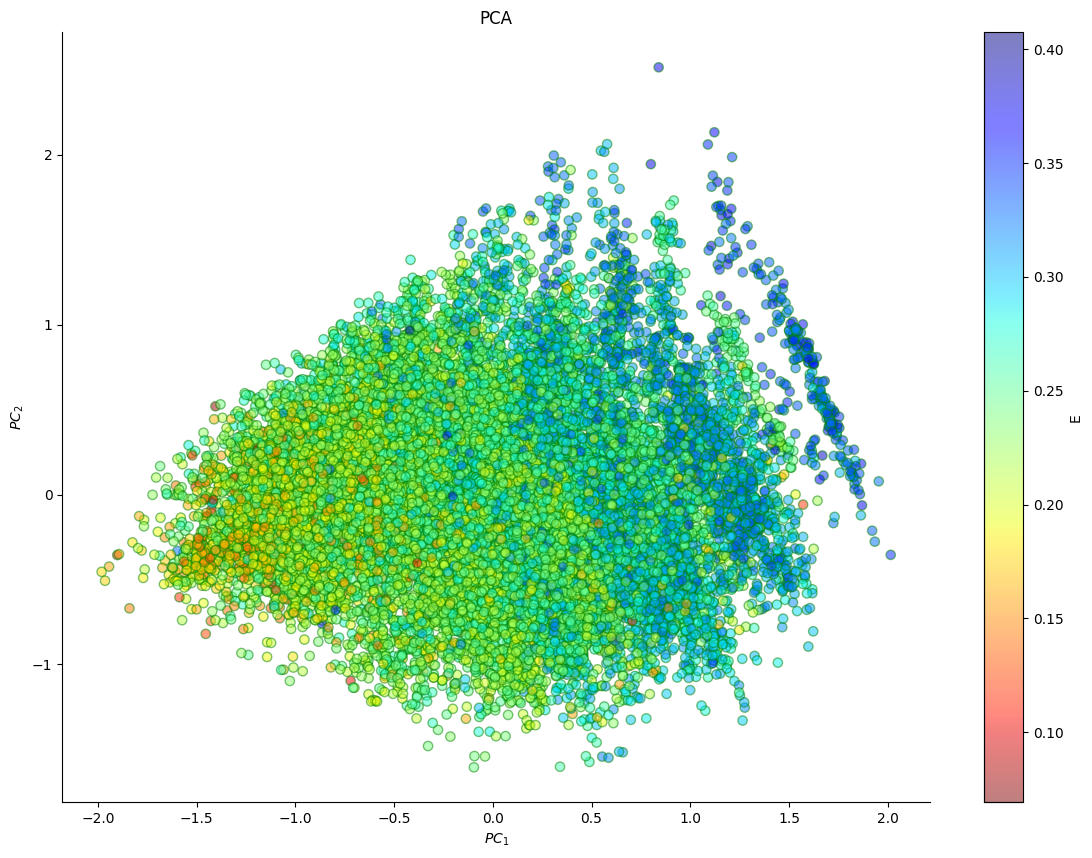

In [30]:
#Perform PCA with two principal components
X_reduced = PCA_implementation(X_norm, 2)

#Plot results colored by target values
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[:,0], -X_reduced[:,1], c=Y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$PC_1$')
plt.ylabel(r'$PC_2$')
plt.title('PCA')
sns.despine()
plt.show()

In [31]:
#Import required libraries
from sklearn.decomposition import PCA

#Perform PCA with specified variance of 95%
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_norm)

#Print results
print('Original Dimensions: ', X_norm.shape)
print('Reduced Dimensions: ', X_reduced.shape)
print("Explained variance: ", pca.explained_variance_ratio_.sum())

Original Dimensions:  (19652, 177)
Reduced Dimensions:  (19652, 56)
Explained variance:  0.9513279254148204


**95%** of variance is observed with **56 dimensions** or principal components

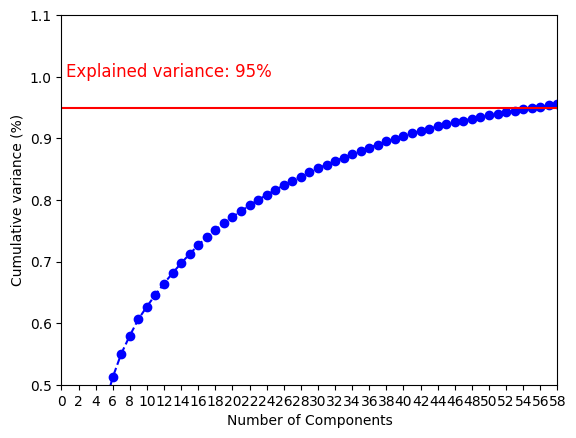

In [32]:
#Perform PCA
pca = PCA()
X_reduced = pca.fit_transform(X_norm)

#Calculate cumulative variance
y = np.cumsum(pca.explained_variance_ratio_)

#Calculate principal components
xi = np.arange(1, y.shape[0]+1, step=1)

#Plot results
plt.ylim(0.5,1.1)
plt.xlim(0.0,15.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 60, step=2))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 1, 'Explained variance: 95%', color = 'red', fontsize=12)
ax.grid(axis='x')
plt.show()

We got the same result. 95% of the dispersion is observed with **56** principal components.

<Axes: title={'center': 'Component Variance'}, xlabel='PCs', ylabel='Eigenvalues'>

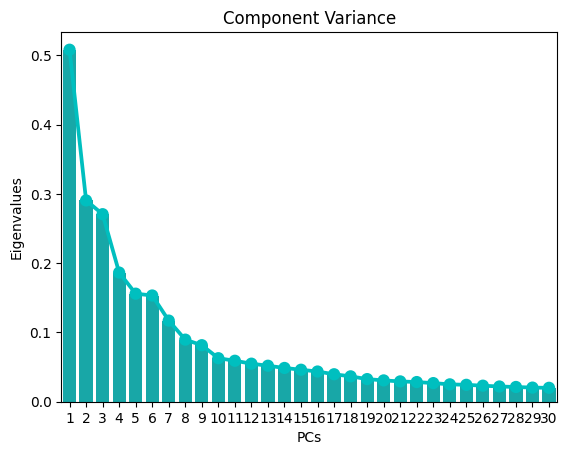

In [33]:
#Perform PCA
pca = PCA()
X_reduced = pca.fit_transform(X_norm)

#Calculate explained variance for each PC
dfScree = pd.DataFrame({'Eigenvalues':pca.explained_variance_,'PCs':[i for i in range(1,pca.n_components_+1)]})

#Plot the variance explained by each component
sns.barplot(x='PCs',y="Eigenvalues",data=dfScree[0:30], color="c").set_title('Component Variance')
sns.pointplot(x='PCs',y="Eigenvalues",data=dfScree[0:30], color="c")

In [34]:
pca = PCA(n_components=19)
X_reduced = pca.fit_transform(X_norm)

In [35]:
#Combine the original data (X_pubchem) and first three PCs
df_pc = pd.DataFrame(data = X_reduced, columns = [f'PC{i}' for i in range(1,20)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3']],pd.DataFrame(X_norm[features[10:17]], columns=features[10:17])], axis=1)
df_col

,PC1,PC2,PC3,BCUT2D_MWHI,BCUT2D_MRHI,BalabanJ,BertzCT,Chi0,Chi1n,PEOE_VSA1
0,-0.628336,-0.681154,-0.077146,0.513888,0.679971,0.232819,0.500795,0.689069,0.481390,0.177247
1,-0.679859,-0.277993,-0.180938,0.447206,0.551828,0.220110,0.213377,0.599667,0.400090,0.362753
2,-0.143767,-0.228818,-0.162506,0.518069,0.591373,0.155668,0.366179,0.675160,0.643418,0.360594
3,-0.967744,-0.222427,-0.661917,0.469769,0.819528,0.215786,0.378860,0.830626,0.463753,0.390026
4,0.033898,-0.048355,-0.124891,0.503065,0.499854,0.130943,0.330500,0.631865,0.649925,0.376194
...,...,...,...,...,...,...,...,...,...,...
19647,-0.580234,0.380592,0.801786,0.529832,0.265308,0.319859,0.352410,0.556371,0.345795,0.177247
19648,0.109768,0.268936,0.454478,0.507375,0.357079,0.317194,0.362807,0.599667,0.434849,0.177247
19649,0.632269,-0.321588,0.082765,0.509936,0.354519,0.224484,0.464537,0.689069,0.670978,0.177247
19650,-0.315546,0.042374,-0.212055,0.513199,0.591260,0.274736,0.375270,0.787330,0.531691,0.177247


In [36]:
#Compute the correlations between the original data and PCs
corMatrix = pd.DataFrame.corr(df_col)

corMatrix.style.background_gradient(cmap='Blues')

,PC1,PC2,PC3,BCUT2D_MWHI,BCUT2D_MRHI,BalabanJ,BertzCT,Chi0,Chi1n,PEOE_VSA1
PC1,1.000000,0.000000,-0.000000,-0.270245,-0.326513,-0.712365,-0.167225,-0.498203,0.880824,-0.366691
PC2,0.000000,1.000000,-0.000000,-0.306887,-0.383244,0.303361,-0.354295,0.415601,0.115965,-0.297607
PC3,-0.000000,-0.000000,1.000000,-0.271942,-0.192581,0.185409,0.607407,-0.426771,-0.230211,-0.405149
BCUT2D_MWHI,-0.270245,-0.306887,-0.271942,1.000000,0.043627,0.040938,-0.006184,0.087908,-0.224716,0.369927
BCUT2D_MRHI,-0.326513,-0.383244,-0.192581,0.043627,1.000000,0.088725,0.167569,0.153235,-0.212308,0.055056
BalabanJ,-0.712365,0.303361,0.185409,0.040938,0.088725,1.000000,0.159473,0.538532,-0.686911,0.050273
BertzCT,-0.167225,-0.354295,0.607407,-0.006184,0.167569,0.159473,1.000000,-0.013281,-0.222272,-0.152558
Chi0,-0.498203,0.415601,-0.426771,0.087908,0.153235,0.538532,-0.013281,1.000000,-0.194331,0.160436
Chi1n,0.880824,0.115965,-0.230211,-0.224716,-0.212308,-0.686911,-0.222272,-0.194331,1.000000,-0.272072
PEOE_VSA1,-0.366691,-0.297607,-0.405149,0.369927,0.055056,0.050273,-0.152558,0.160436,-0.272072,1.000000


In [38]:
#Select descriptors obtained from PubChem
features = features[10:17]

#Calculate loading scores
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#Plot results
fig = px.scatter(df_pc, x='PC1', y='PC2')
for i, feature in enumerate(features):
    i += 177
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*100,
        y1=loadings[i, 1]*100
    )
    fig.add_annotation(
        x=loadings[i, 0]*120,
        y=loadings[i, 1]*120,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [39]:
#Create labels for Y
bins = np.linspace(round(Y.min(),0)-1, round(Y.max(),0)+1, num = 24)
Y_labels = np.digitize(Y, bins)

<Axes: xlabel='Y_labels', ylabel='PC1'>

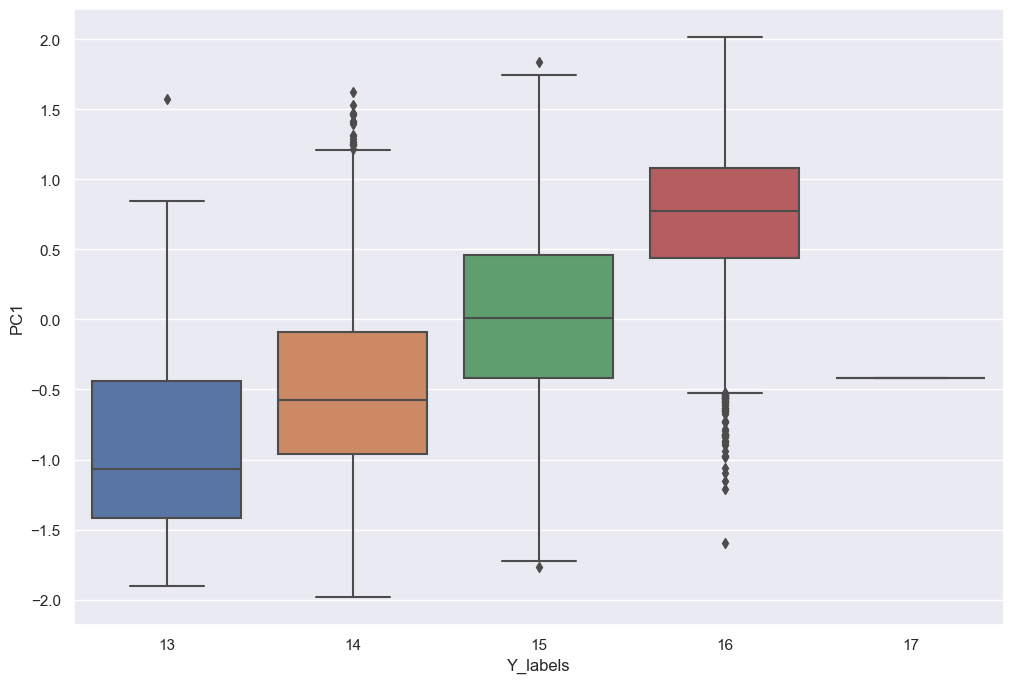

In [40]:
#Plot the distribution of target per component
target_PCA=pd.DataFrame(zip(X_reduced[:,0],X_reduced[:,1],Y_labels),columns=["PC1","PC2","Y_labels"])

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='Y_labels', y='PC1', data=target_PCA)

<Axes: xlabel='Y_labels', ylabel='PC2'>

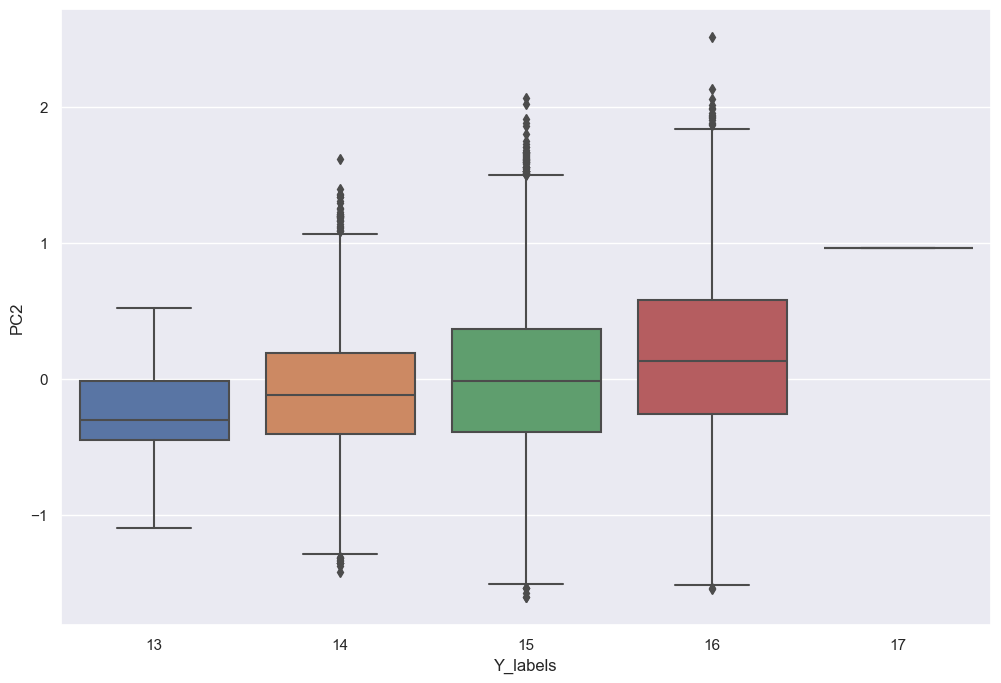

In [41]:
#Plot graphs
sns.boxplot(x='Y_labels', y='PC2', data=target_PCA)

The above plots show how the PCA has distributed the dataset based on their target variables in different components. We can also see that some classes contain outliers.

# Nonlinear methods
Kernel PCA
t-SNE
UMAP

In [43]:
df_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.628336,-0.681154,-0.077146,0.067369,-0.582975,0.108380,0.280059,0.075056,0.042116,0.055906,0.064279,-0.299776,0.396330,-0.284560,0.267874,0.232684,0.083321,0.132735,0.007755
1,-0.679859,-0.277993,-0.180938,0.458720,-0.495125,0.670067,0.037953,0.484385,-0.195898,0.416635,0.450652,0.303741,0.128688,0.020061,0.047903,-0.040816,-0.047822,0.004014,-0.147119
2,-0.143767,-0.228818,-0.162506,0.235932,-0.478982,-0.031567,-0.232073,-0.141698,-0.406648,0.177065,-0.040992,-0.096258,0.071693,0.336934,-0.256917,0.165668,-0.301001,0.145250,0.391644
3,-0.967744,-0.222427,-0.661917,0.172828,0.366124,0.495340,0.569123,-0.027956,-0.082895,-0.491796,-0.415488,-0.004437,-0.000824,0.094104,0.049471,-0.161426,-0.105717,0.050663,-0.298855
4,0.033898,-0.048355,-0.124891,0.867367,-0.208648,-0.092020,0.494180,0.039445,-0.277649,-0.172935,0.042388,-0.277266,0.187222,-0.223450,-0.119711,0.044126,-0.064024,0.187199,0.094826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,-0.580234,0.380592,0.801786,0.387445,-0.206436,-0.579639,-0.251877,0.158721,-0.102720,0.295179,-0.271586,0.289711,-0.135773,0.021506,0.055445,-0.108018,-0.126452,0.066583,-0.063754
19648,0.109768,0.268936,0.454478,0.199520,0.007425,-0.011918,-0.667729,0.563419,0.063831,-0.437543,-0.047545,0.013657,-0.462504,-0.173242,0.096471,-0.047040,0.108359,0.000893,0.160151
19649,0.632269,-0.321588,0.082765,0.091084,0.299837,-0.120580,-0.308080,0.022174,0.067898,0.213474,-0.105827,-0.602073,0.137866,0.286519,-0.263930,-0.095282,-0.138643,0.108581,0.008622
19650,-0.315546,0.042374,-0.212055,0.222002,-0.153397,0.399346,-0.455786,0.142398,0.214082,-0.030819,-0.059927,-0.163117,0.109345,-0.087897,-0.054941,-0.004392,0.005716,-0.136796,0.276215


In [60]:
df_pc[target] = Y
df_pc['smiles'] = data['smiles']
df_pc.to_csv('reduced.csv', index=False)

## **Kernel PCA**

In [70]:
#Import required libraries
from sklearn.decomposition import KernelPCA

In [71]:
#Perform kernel PCA with sigmoid kernel
sigmoid_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma=0.01)
X_sigmoid = sigmoid_pca.fit_transform(X_norm)

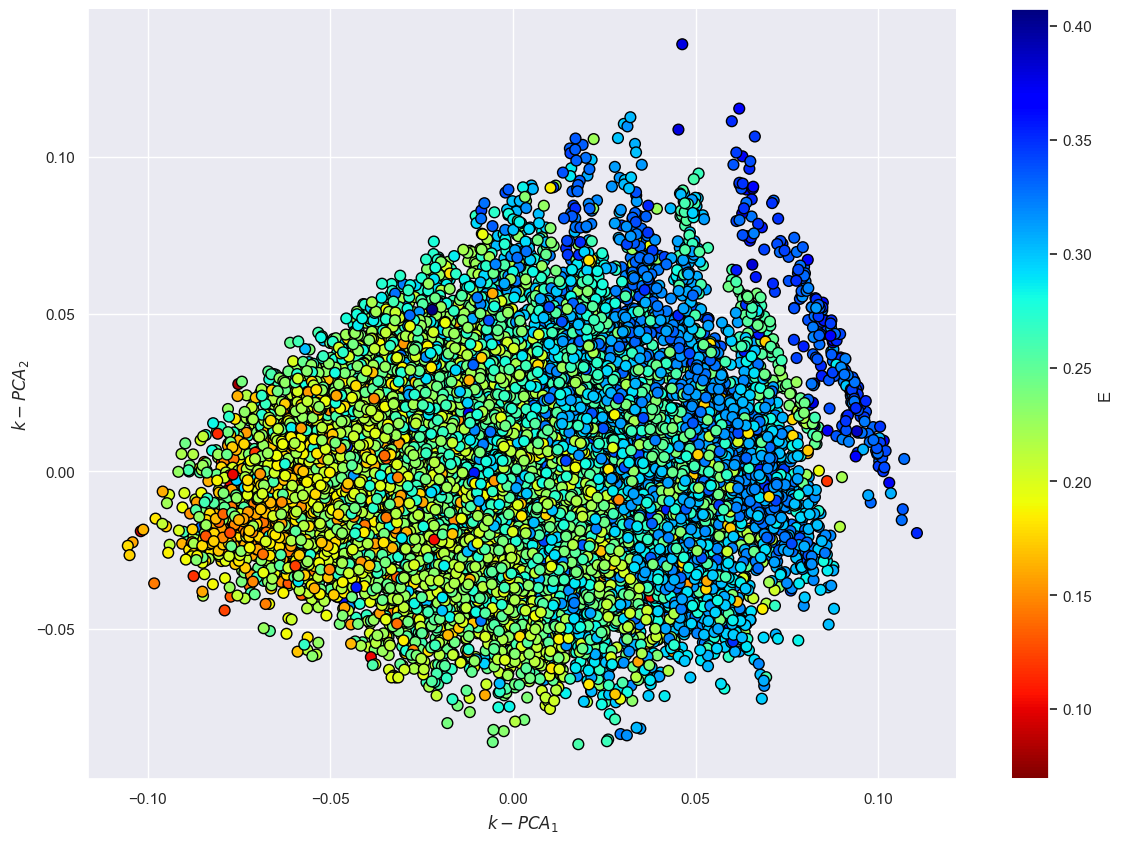

In [72]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$k-PCA_1$')
plt.ylabel(r'$k-PCA_2$')
sns.despine()
plt.show()

In [78]:
#Calculate the explained variance
explained_variance = np.var(X_sigmoid, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Variance Explained: ", np.sum(explained_variance_ratio))

Variance Explained:  1.0


Kernel PCA, with a sigmoid kernel, explains 100% of the original variance of our data with only 2 components, perfect for visualization purposes.